In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

df.head()
df.shape
df.info()
df.describe()
import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [2]:
df.isnull().sum()


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [3]:
# Filling numeric columns with median
num_cols = ['Avg VTAT','Avg CTAT','Booking Value','Ride Distance','Driver Ratings','Customer Rating']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Filling cancellation/incomplete columns with 0
df[['Cancelled Rides by Customer','Cancelled Rides by Driver','Incomplete Rides']] = df[['Cancelled Rides by Customer','Cancelled Rides by Driver','Incomplete Rides']].fillna(0)

# Filling categorical columns with 'Unknown'
cat_cols = ['Reason for cancelling by Customer','Driver Cancellation Reason','Incomplete Rides Reason','Payment Method']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
    


In [4]:
df.isnull().sum()

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Driver Cancellation Reason           0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64

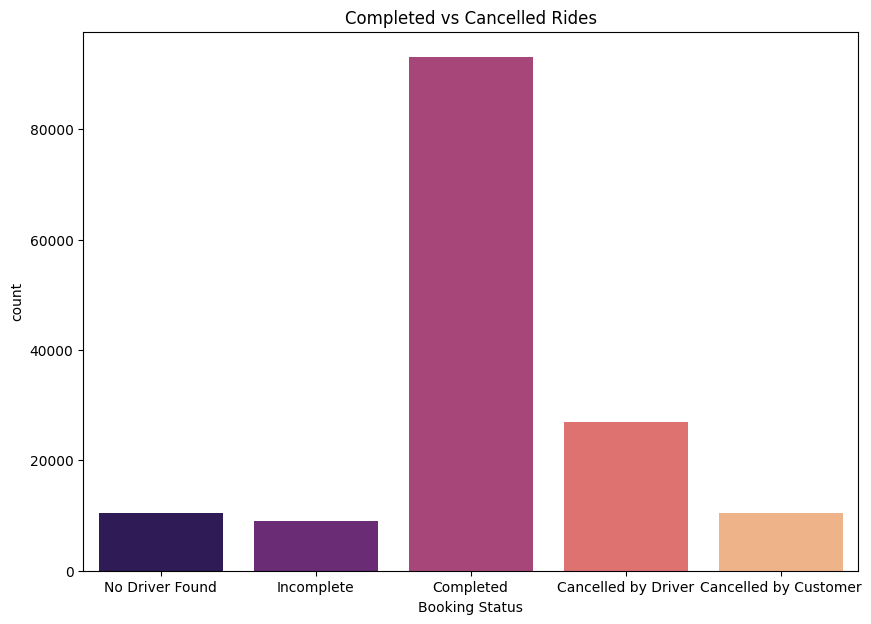

In [5]:
#Bar Graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Booking Status', palette='magma')
plt.title("Completed vs Cancelled Rides")
plt.show()


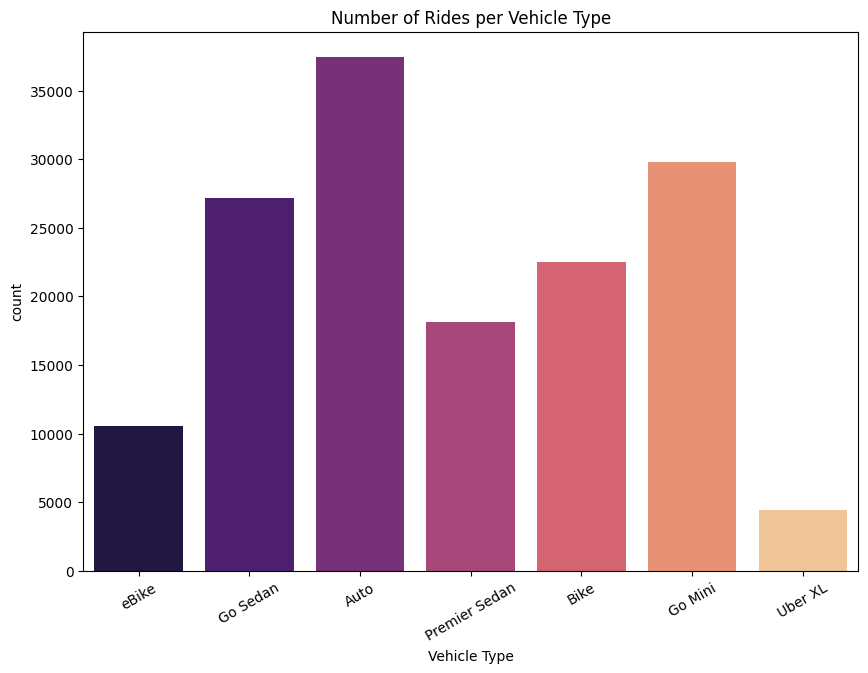

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Vehicle Type', palette='magma')
plt.title("Number of Rides per Vehicle Type")
plt.xticks(rotation= 30,ha='center')
plt.show()


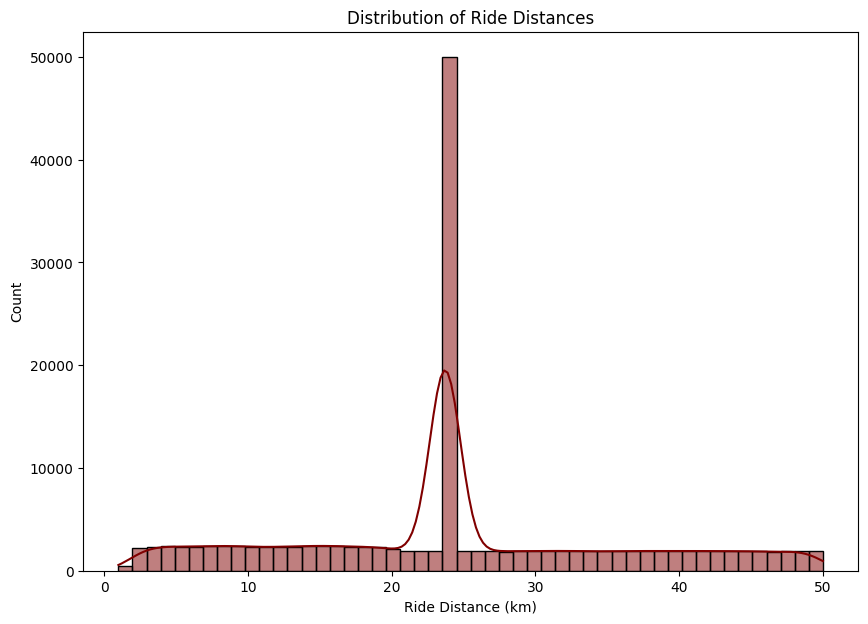

In [7]:
#Histogram
plt.figure(figsize=(10,7))
sns.histplot(df['Ride Distance'], bins=50, kde=True, color='maroon')
plt.title("Distribution of Ride Distances")
plt.xlabel("Ride Distance (km)")
plt.show()


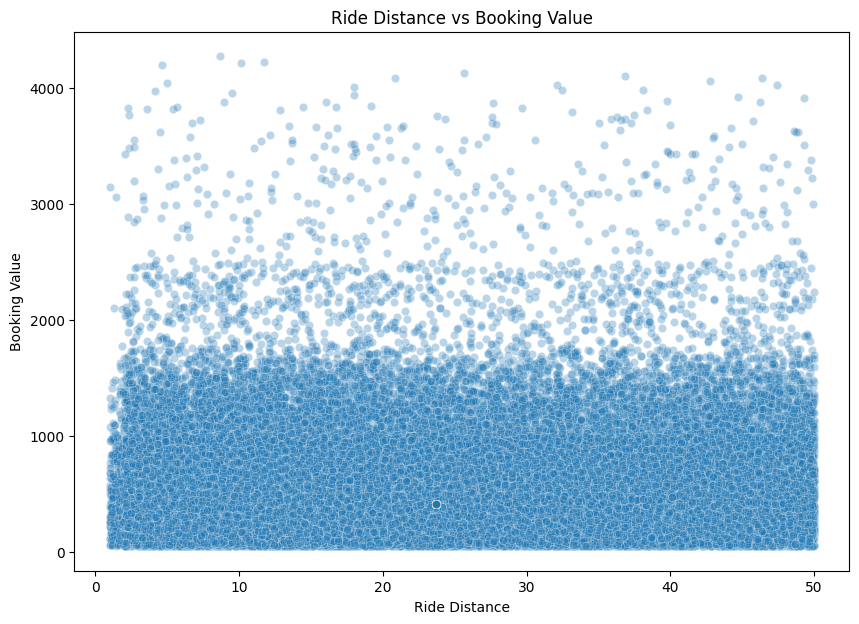

In [8]:
#Scatter Plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Ride Distance', y='Booking Value', alpha=0.3)
plt.title("Ride Distance vs Booking Value")
plt.show()


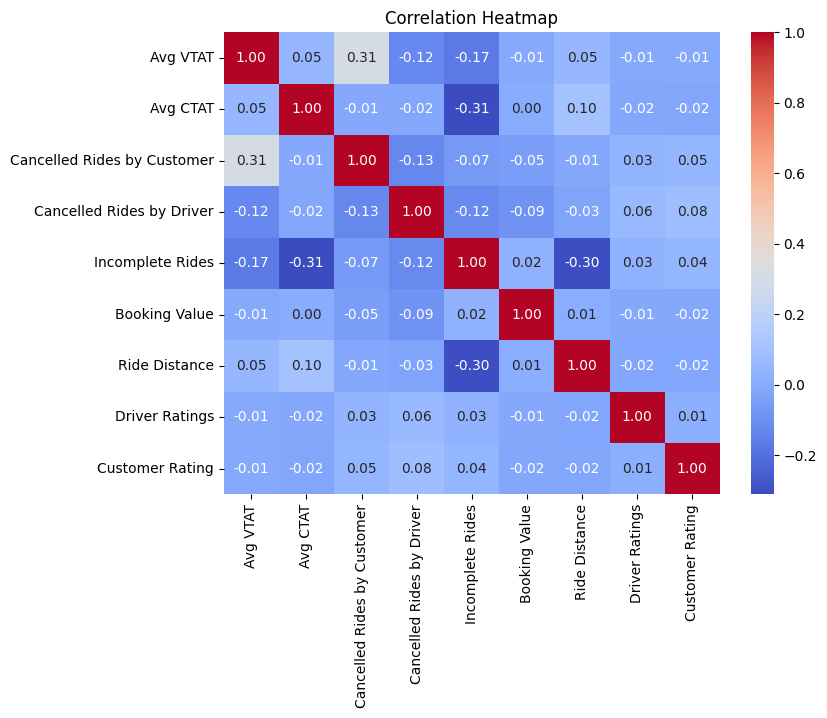

In [9]:
#HeatMap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Mean
print("*****Mean*****")
print(df.mean(numeric_only=True))

# Median
print("\n*****Median*****")
print(df.median(numeric_only=True))

# Mode
print("\n*****Mode*****")
print(df.mode().iloc[0])  # first mode in case of multiple

# Standard Deviation
print("\n*****Standard Deviation*****")
print(df.std(numeric_only=True))

# Variance
print("\n*****Variance*****")
print(df.var(numeric_only=True))

# Skewness
print("\n*****Skewness*****")
print(df.skew(numeric_only=True))

# Kurtosis
print("\n*****Kurtosis*****")
print(df.kurt(numeric_only=True))


*****Mean*****
Avg VTAT                         8.445407
Avg CTAT                        29.037753
Cancelled Rides by Customer      0.070000
Cancelled Rides by Driver        0.180000
Incomplete Rides                 0.060000
Booking Value                  478.121220
Ride Distance                   24.343568
Driver Ratings                   4.257215
Customer Rating                  4.440842
dtype: float64

*****Median*****
Avg VTAT                         8.30
Avg CTAT                        28.80
Cancelled Rides by Customer      0.00
Cancelled Rides by Driver        0.00
Incomplete Rides                 0.00
Booking Value                  414.00
Ride Distance                   23.72
Driver Ratings                   4.30
Customer Rating                  4.50
dtype: float64

*****Mode*****
Date                                   2024-11-16
Time                                     17:44:57
Booking ID                           "CNR2726142"
Booking Status                          Completed
C

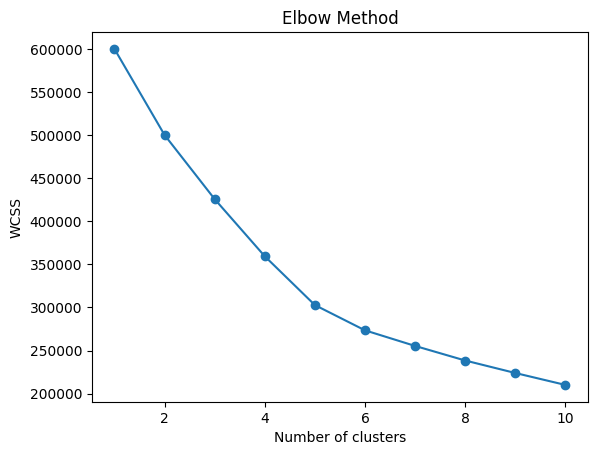

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pick numeric features for clustering
features = ['Ride Distance', 'Booking Value', 'Driver Ratings', 'Customer Rating']
X = df[features]

# Scale the data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
